Importing Libraries

In [1]:
import cv2
import torch
import matplotlib.pyplot as plt

Downloading small model

In [2]:
midas = torch.hub.load("intel-isl/MiDaS", "DPT_Hybrid")
transforms = torch.hub.load("intel-isl/MiDaS", "transforms")

Using cache found in C:\Users\faree/.cache\torch\hub\intel-isl_MiDaS_master
c:\Users\faree\Desktop\MIDAS tu\.venv-midas-word\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Using cache found in C:\Users\faree/.cache\torch\hub\intel-isl_MiDaS_master


In [4]:
transform = transforms.dpt_transform

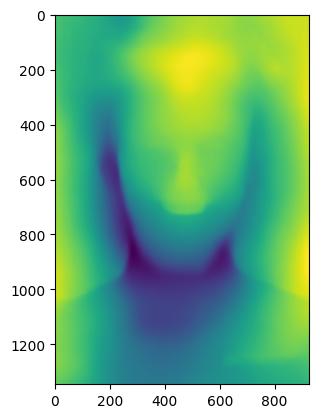

In [6]:
filename = 'face2.jpg'
img = cv2.imread(filename)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

input_batch = transform(img).to('cpu')

with torch.no_grad():
    prediction = midas(input_batch)

    prediction = torch.nn.functional.interpolate(
        prediction.unsqueeze(1),
        size=img.shape[:2],
        mode="bicubic",
        align_corners=False,
    ).squeeze()

output = prediction.cpu().numpy()

plt.imshow(output)

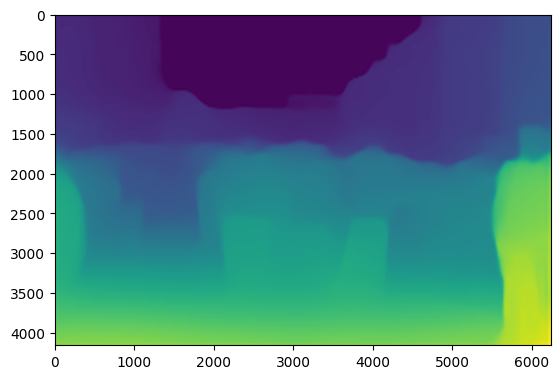